### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
from stable_baselines3 import PPO, A2C, DQN
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

In [2]:
# Import classes
from rl_environment import Environment

### 2. Environment creation

#### Parameters for Simulation

In [3]:
number_of_regional_warehouses = 3
max_inventory_amount_regional_warehouses = 30
max_inventory_amount_central_warehouse = 60
customer_demand_per_step = [2,3,1]  # List needs one entry per regional warehouse 
simulation_length = 40
lead_time = 2
shipment_amount = [10]  # Regarding regional warehouses
with_manufacturer = True
cw_shipment_amount = 10  # Regarding central warehouse
manufacturer_prod_capacity_per_step = 10
shipment_var_cost_per_unit = 0.02
shipment_fixed_cost = .25  # Reward penalty
inventory_holding_cost_multiplier = 1 # Standard = 1; Can be lowered; Not higher that 1
cw_inventory_holding_cost_multiplier = .5
demand_fluctuation = 1
lead_time_fluctuation = 1
customer_priorities = [1, 1, 1] # List needs one entry per regional warehouse customer 

#### Parameters for Agent Training

In [4]:
algorithm = "A2C"  # "PPO", "A2C" or "DQN"
training_steps = 50000

print("-> Equals to " + str(int(training_steps/simulation_length)) + " training episodes")

-> Equals to 1250 training episodes


###### Determine if chosen algorithm needs discrete action space

In [5]:
algorithms_that_need_single_action_value = ["DQN"]

if algorithm.upper() in algorithms_that_need_single_action_value:
    use_single_value_action_space = True
else:
    use_single_value_action_space = False

#### Creating Environment

In [6]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount,
                  manufacturer = with_manufacturer,
                  cw_shipment_amount = cw_shipment_amount,
                  mf_prod_capacity = manufacturer_prod_capacity_per_step,
                  shipment_var_cost_per_unit = shipment_var_cost_per_unit,
                  shipment_fixed_cost = shipment_fixed_cost,
                  inventory_holding_cost_multiplier = inventory_holding_cost_multiplier,
                  cw_inventory_holding_cost_multiplier = cw_inventory_holding_cost_multiplier,
                  demand_fluctuation = demand_fluctuation,
                  lead_time_fluctuation = lead_time_fluctuation,
                  use_single_value_action_space = use_single_value_action_space,
                  customer_priorities = customer_priorities
                 )

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 20
regional_warehouse_1 ; ID: 1 ; Inventory: 10 ; Demand: 2 ; Priority: 1.0 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 10 ; Demand: 3 ; Priority: 1.0 ; Lost sales: 0
regional_warehouse_3 ; ID: 3 ; Inventory: 10 ; Demand: 1 ; Priority: 1.0 ; Lost sales: 0

-> Production plant:
manufacturer ; Production per step: 10 ; Inventory: 100
________________________________________________________________________________
Environment Information
-----------------------
-> Gym spaces:
Observation space: Dict(cw_inventory:Discrete(61), cw_shipment:Discrete(2), rw_inventories:MultiDiscrete([31 31 31]), shipments:MultiDiscrete([2 2 2]))
Action space: MultiDiscrete([2 2 2 2])
Starting state: {'rw_inventories': array([10, 10, 10]), '

### 3. RL model training

###### Model Selection
PPO (Proximal Policy Optimization)
https://openai.com/blog/openai-baselines-ppo/

A2C
https://openai.com/blog/baselines-acktr-a2c/

In [7]:
if algorithm.upper() == "PPO":
    trained_model = PPO("MultiInputPolicy", env, verbose=1)
elif algorithm.upper() == "A2C":
    trained_model = A2C("MultiInputPolicy", env, verbose=1)
elif algorithm.upper() == "DQN":
    trained_model = DQN("MultiInputPolicy", env, verbose=1)
else:
    print("Model not found")
    exit()
trained_model.learn(total_timesteps=training_steps)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | -1.65    |
| time/                 |          |
|    fps                | 359      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -2.62    |
|    explained_variance | 0.563    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -1.25    |
|    value_loss         | 0.307    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | -1.16    |
| time/                 |          |
|    fps                | 366      |
|    iterations         | 200      |
|    time_elapsed 

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 0.647    |
| time/                 |          |
|    fps                | 372      |
|    iterations         | 1400     |
|    time_elapsed       | 18       |
|    total_timesteps    | 7000     |
| train/                |          |
|    entropy_loss       | -1.77    |
|    explained_variance | -1.05    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1399     |
|    policy_loss        | -0.825   |
|    value_loss         | 0.224    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 0.765    |
| time/                 |          |
|    fps                | 372      |
|    iterations         | 1500     |
|    time_elapsed       | 20       |
|    total_timesteps    | 7500     |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 1.5      |
| time/                 |          |
|    fps                | 357      |
|    iterations         | 2800     |
|    time_elapsed       | 39       |
|    total_timesteps    | 14000    |
| train/                |          |
|    entropy_loss       | -1.01    |
|    explained_variance | 0.222    |
|    learning_rate      | 0.0007   |
|    n_updates          | 2799     |
|    policy_loss        | 0.146    |
|    value_loss         | 0.0392   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 1.59     |
| time/                 |          |
|    fps                | 357      |
|    iterations         | 2900     |
|    time_elapsed       | 40       |
|    total_timesteps    | 14500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 1.98     |
| time/                 |          |
|    fps                | 356      |
|    iterations         | 4200     |
|    time_elapsed       | 58       |
|    total_timesteps    | 21000    |
| train/                |          |
|    entropy_loss       | -1.12    |
|    explained_variance | 0.101    |
|    learning_rate      | 0.0007   |
|    n_updates          | 4199     |
|    policy_loss        | 0.193    |
|    value_loss         | 0.055    |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 1.95     |
| time/                 |          |
|    fps                | 356      |
|    iterations         | 4300     |
|    time_elapsed       | 60       |
|    total_timesteps    | 21500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 2.15     |
| time/                 |          |
|    fps                | 356      |
|    iterations         | 5600     |
|    time_elapsed       | 78       |
|    total_timesteps    | 28000    |
| train/                |          |
|    entropy_loss       | -0.74    |
|    explained_variance | -0.227   |
|    learning_rate      | 0.0007   |
|    n_updates          | 5599     |
|    policy_loss        | -0.0647  |
|    value_loss         | 0.0124   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 2.14     |
| time/                 |          |
|    fps                | 356      |
|    iterations         | 5700     |
|    time_elapsed       | 79       |
|    total_timesteps    | 28500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 2.61     |
| time/                 |          |
|    fps                | 355      |
|    iterations         | 7000     |
|    time_elapsed       | 98       |
|    total_timesteps    | 35000    |
| train/                |          |
|    entropy_loss       | -0.621   |
|    explained_variance | -1.78    |
|    learning_rate      | 0.0007   |
|    n_updates          | 6999     |
|    policy_loss        | -0.121   |
|    value_loss         | 0.0966   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 2.75     |
| time/                 |          |
|    fps                | 354      |
|    iterations         | 7100     |
|    time_elapsed       | 100      |
|    total_timesteps    | 35500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 2.9      |
| time/                 |          |
|    fps                | 356      |
|    iterations         | 8400     |
|    time_elapsed       | 117      |
|    total_timesteps    | 42000    |
| train/                |          |
|    entropy_loss       | -0.731   |
|    explained_variance | 0.47     |
|    learning_rate      | 0.0007   |
|    n_updates          | 8399     |
|    policy_loss        | -0.201   |
|    value_loss         | 0.0501   |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 2.99     |
| time/                 |          |
|    fps                | 356      |
|    iterations         | 8500     |
|    time_elapsed       | 119      |
|    total_timesteps    | 42500    |
| train/                |          |
|

------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 3.09     |
| time/                 |          |
|    fps                | 356      |
|    iterations         | 9800     |
|    time_elapsed       | 137      |
|    total_timesteps    | 49000    |
| train/                |          |
|    entropy_loss       | -0.368   |
|    explained_variance | -0.212   |
|    learning_rate      | 0.0007   |
|    n_updates          | 9799     |
|    policy_loss        | 0.0113   |
|    value_loss         | 0.00906  |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 40       |
|    ep_rew_mean        | 2.96     |
| time/                 |          |
|    fps                | 356      |
|    iterations         | 9900     |
|    time_elapsed       | 138      |
|    total_timesteps    | 49500    |
| train/                |          |
|

###### Learning Curve

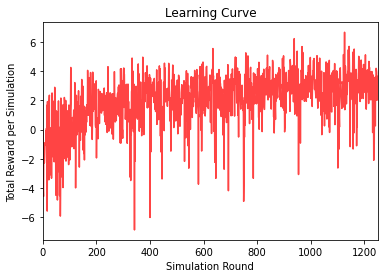

In [8]:
plt.rcParams["figure.figsize"] = (10, 5)
plt.plot(env.total_reward, color="#FF4444")
plt.title("Learning Curve")
plt.xlim(0, len(env.total_reward))
plt.ylabel("Total Reward per Simulation")
plt.xlabel("Simulation Round")
plt.show()

### 4. Run simulation

In [9]:
# Convert actions for graphs
def convert_to_marker_pos(action):
    return_list = []
    i = 0
    for entry in action:
        if entry != 0:
            return_list.append(i)
        i += 1
    return return_list


# Graph data
cw_inventory_level, cw_actions = [], []
inventory_levels, actions = {}, {}
manufacturer_inventory = []

for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = [0]
    actions[rw_id] = [0]

In [10]:
# Reset environment for simulation
state = env.reset()
done = False

# Run simulation with model
while not done:
    action, _states = trained_model.predict(state) 
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["RW Invs:"]:
        inventory_levels[i].append(inv)
        i += 1

    i = 1
    for act in info["Action:"][0:len(env.simulation.get_regional_warehouses())]:
        actions[i].append(act)
        i += 1
    
    try:
        cw_inventory_level.append(info["CW Inv:"])
        cw_actions.append(info["Action:"][-1])
        manufacturer_inventory.append(info["Manufacturer:"])
    except:
        pass
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

{'rw_inventories': array([10, 10, 10]), 'shipments': array([0, 0, 0]), 'cw_inventory': 20, 'cw_shipment': 0}
Round: 1 | RW Invs: [8, 6, 10] | Shipments [1, 1, 0] | Action: [1, 1, 0, 0] | Reward: -0.01 | CW Inv: 0 | Manufacturer: 100 | 
{'rw_inventories': array([ 8,  6, 10]), 'shipments': array([1, 1, 0]), 'cw_inventory': 0, 'cw_shipment': 0}
Round: 2 | RW Invs: [6, 4, 10] | Shipments [1, 1, 0] | Action: [0, 0, 0, 0] | Reward: 0.23 | CW Inv: 0 | Manufacturer: 100 | 
{'rw_inventories': array([ 6,  4, 10]), 'shipments': array([1, 1, 0]), 'cw_inventory': 0, 'cw_shipment': 0}
Round: 3 | RW Invs: [14, 1, 8] | Shipments [0, 1, 0] | Action: [0, 0, 0, 1] | Reward: 0.29 | CW Inv: 0 | Manufacturer: 90 | 
{'rw_inventories': array([14,  1,  8]), 'shipments': array([0, 1, 0]), 'cw_inventory': 0, 'cw_shipment': 1}
Round: 4 | RW Invs: [12, 8, 7] | Shipments [0, 0, 0] | Action: [0, 0, 0, 1] | Reward: 0.2 | CW Inv: 0 | Manufacturer: 90 | 
{'rw_inventories': array([12,  8,  7]), 'shipments': array([0, 0,

###### Inventory level graphs

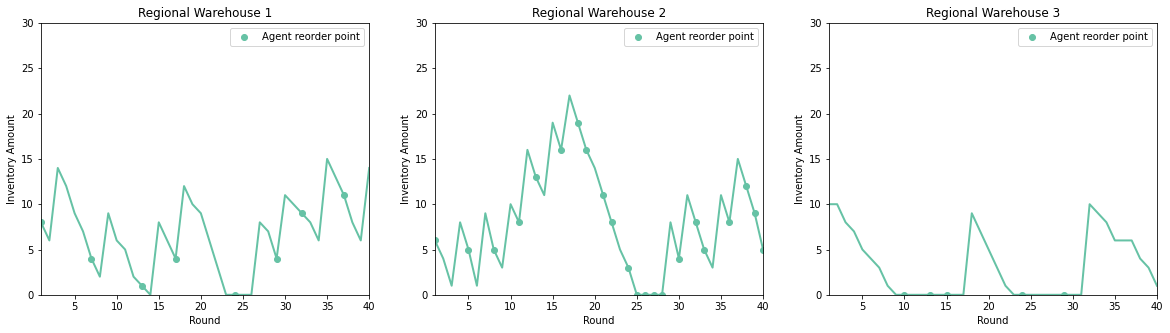

In [11]:
# Plot inventories of regional warehouses

reorder_marker = mlines.Line2D([],[], color='#66C2A5', marker='o', linestyle='None', label="Agent reorder point")
plt.rcParams["figure.figsize"] = (20, 5)

for rw_id in inventory_levels:
    plt.subplot(1, number_of_regional_warehouses, rw_id)
    plt.plot(inventory_levels[rw_id], "-bo", markevery=convert_to_marker_pos(actions[rw_id]), color="#66C2A5", linewidth=2)
    plt.legend(handles=[reorder_marker])
    plt.title("Regional Warehouse " + str(rw_id))
    plt.ylim(0, max_inventory_amount_regional_warehouses)
    plt.xlim(1, simulation_length)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    
    if False:
        print("RW", rw_id, "data:")
        print("Inventory:", inventory_levels[rw_id])
        print("Actions:", actions[rw_id])
        print("_"*100)

plt.show()

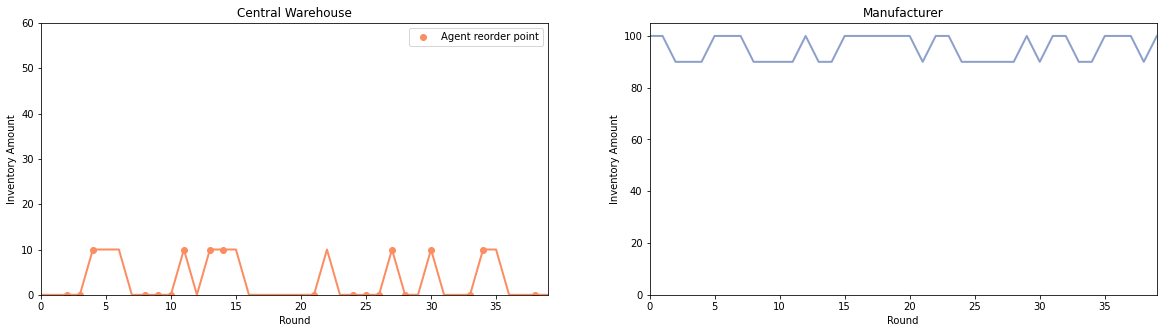

In [12]:
# Plot central warehouse inventory (Only display if simulated by adding a manufacturer)
if len(cw_inventory_level) != 0:
    plt.rcParams["figure.figsize"] = (20, 5)
    plt.subplot(1, 2, 1)
    reorder_marker = mlines.Line2D([],[], color='#FC8D62', marker='o', linestyle='None', label="Agent reorder point")
    plt.plot(cw_inventory_level, "-bo", color="#FC8D62", markevery=convert_to_marker_pos(cw_actions), linewidth=2)
    plt.legend(handles=[reorder_marker])
    plt.title("Central Warehouse")
    plt.ylim(0, max_inventory_amount_central_warehouse)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    
    plt.subplot(1, 2, 2)
    plt.plot(manufacturer_inventory, color="#8DA0CB", linewidth=2)
    plt.title("Manufacturer")
    plt.ylim(0, env.simulation.get_manufacturer().get_inventory_limit()+5)
    plt.xlim(0, simulation_length-1)
    plt.ylabel("Inventory Amount")
    plt.xlabel("Round")
    plt.show()